# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

For clusters =2,hc_ward,average silhouette_score is :0.6867350732769776
For clusters =2,hc_complete,average silhouette_score is :0.5159829508133175
For clusters =2,hc_average,average silhouette_score is :0.6867350732769776
For clusters =3,hc_ward,average silhouette_score is :0.5543236611296415
For clusters =3,hc_complete,average silhouette_score is :0.5135953221192208
For clusters =3,hc_average,average silhouette_score is :0.5541608580282847
For clusters =4,hc_ward,average silhouette_score is :0.4889670857554686
For clusters =4,hc_complete,average silhouette_score is :0.4998128294171966
For clusters =4,hc_average,average silhouette_score is :0.4719936084994249


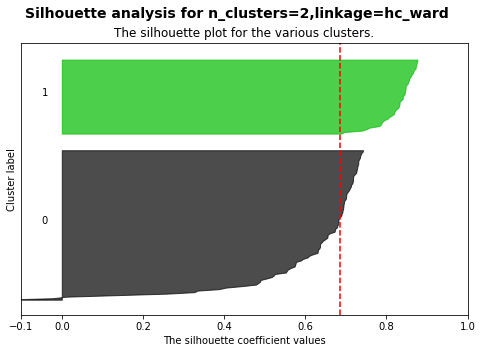

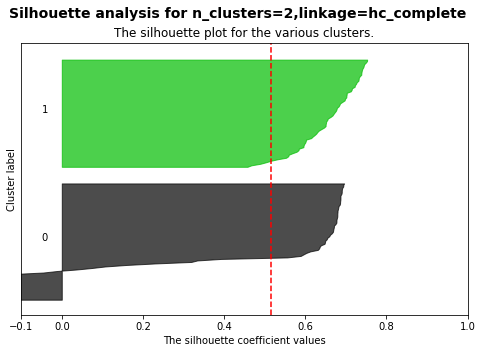

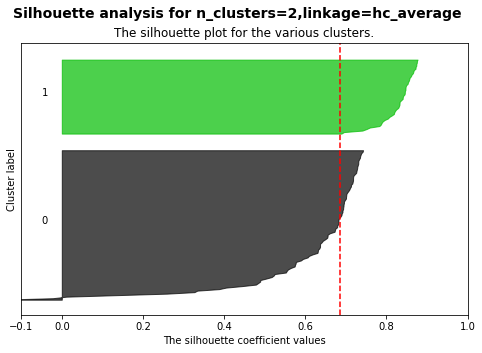

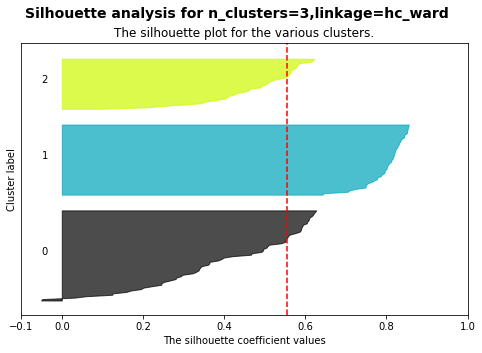

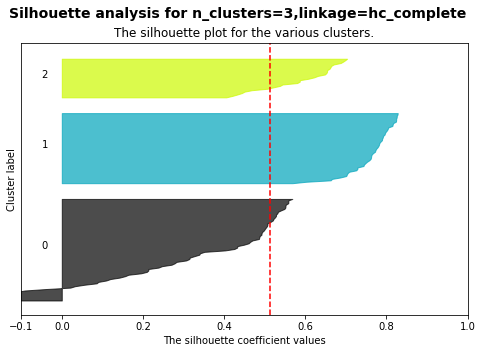

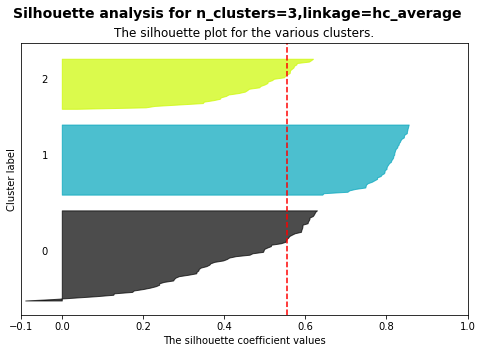

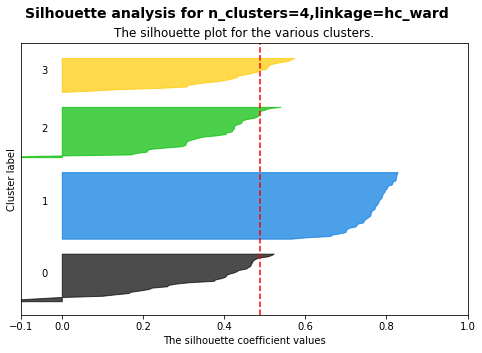

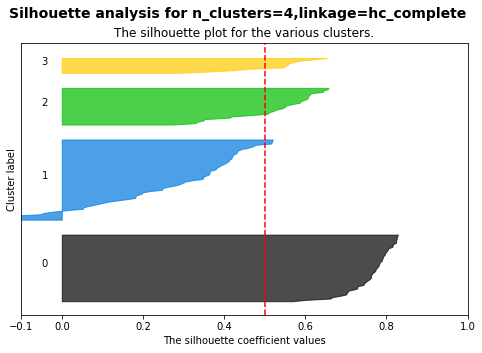

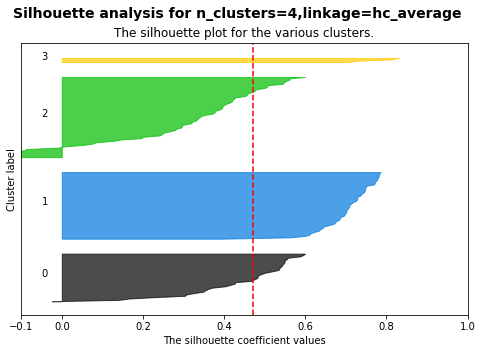

In [4]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4]
for clusters in range_n_clusters :
    
    estimators = [('hc_ward', AgglomerativeClustering(n_clusters=clusters, linkage="ward")),
                 ('hc_complete', AgglomerativeClustering(n_clusters=clusters, linkage="complete")),
                 ('hc_average', AgglomerativeClustering(n_clusters=clusters, linkage="average"))]
    
    for name, est in estimators:
        cluster_labels=est.fit_predict(X)
        silhouette_avg=silhouette_score(X,cluster_labels)
        print(f'For clusters ={clusters},{name},average silhouette_score is :{silhouette_avg}')

        plt.figure(figsize=(8, 5))    
        plt.xlim([-0.1, 1])
        plt.ylim([0,len(X) + (clusters + 1) * 10])
        
               
        sample_silhouette_values=silhouette_samples(X,cluster_labels)
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")    
    
       
        y_lower = 10
        for i in range(clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / clusters)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
       
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
            plt.yticks([])  # 清空 y 軸的格線
            plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
            plt.title("The silhouette plot for the various clusters.")
            plt.xlabel("The silhouette coefficient values")
            plt.ylabel("Cluster label")
        
            y_lower=y_upper+10
        
        plt.suptitle((f'Silhouette analysis for n_clusters={clusters},linkage={name}'),
                     fontsize=14, fontweight='bold')
    
plt.show()